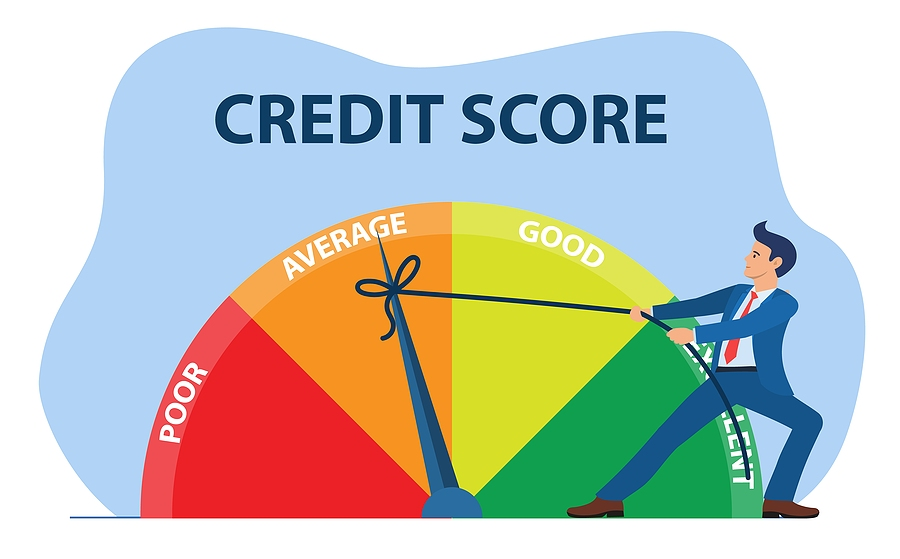

**CREDIT SCORING MODEL**

INTRODUCTION

Credit scoring models are statistical tools used by financial institutions to assess the creditworthiness of individuals or businesses. They use historical financial data and various factors to predict the likelihood of a borrower defaulting on a loan or credit obligation.

These models generate a credit score, which is a numerical representation of credit risk. Higher scores indicate lower risk, making borrowers more likely to be approved for credit and receive favorable terms.

Credit scoring models consider various factors, including:

* Payment history: Past payment behavior on loans and credit cards.
* Amounts owed: Outstanding debt levels and credit utilization.
* Length of credit history: The duration of credit accounts.
* New credit: Recent credit applications and inquiries.
* Types of credit used: Mix of credit accounts (e.g., credit cards, installment loans).

Lenders use credit scores to make informed decisions about loan approvals, interest rates, and credit limits. Credit scoring models help automate and standardize the credit risk assessment process, ensuring fairness and consistency.

In essence, credit scoring models are essential tools for managing credit risk in the financial industry. They play a crucial role in facilitating lending decisions and ensuring responsible credit practices.

**Mount Google Drive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import necessary libraries**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Load and Prepare Dataset**

* Loading the dataset brings your SMS data into the Colab environment.

* Splitting the data ensures that you have separate sets for training and evaluating the model's performance.

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Credit_Scoring/Dataset_CreditScoring.csv')

In [6]:
data.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,92%,21%,2,3,7,21%,4,4,0%
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,80%,0%,0,0,0,100%,12,0,100%
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,36%,65%,0,1,1,73%,1,1,53%
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,91%,25%,1,1,1,75%,7,1,133%
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,125%,0%,0,1,4,14%,3,1,0%


from matplotlib import pyplot as plt
_df_0['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['DerogCnt'].plot(kind='hist', bins=20, title='DerogCnt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['CollectCnt'].plot(kind='hist', bins=20, title='CollectCnt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['InqCnt06'].plot(kind='hist', bins=20, title='InqCnt06')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('TLSum').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('TLMaxSum').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('TLBalHCPct').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('TLSatPct').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='ID', y='DerogCnt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='DerogCnt', y='CollectCnt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='CollectCnt', y='InqCnt06', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='InqCnt06', y='InqTimeLast', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TARGET']
  ys = series['DerogCnt']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('TARGET', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TLSum')):
  _plot_series(series, series_name, i)
  fig.legend(title='TLSum', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TARGET')
_ = plt.ylabel('DerogCnt')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TARGET']
  ys = series['DerogCnt']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('TARGET', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TLMaxSum')):
  _plot_series(series, series_name, i)
  fig.legend(title='TLMaxSum', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TARGET')
_ = plt.ylabel('DerogCnt')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TARGET']
  ys = series['DerogCnt']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('TARGET', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TLBalHCPct')):
  _plot_series(series, series_name, i)
  fig.legend(title='TLBalHCPct', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TARGET')
_ = plt.ylabel('DerogCnt')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TARGET']
  ys = series['DerogCnt']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('TARGET', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TLSatPct')):
  _plot_series(series, series_name, i)
  fig.legend(title='TLSatPct', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TARGET')
_ = plt.ylabel('DerogCnt')

from matplotlib import pyplot as plt
_df_16['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['DerogCnt'].plot(kind='line', figsize=(8, 4), title='DerogCnt')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['CollectCnt'].plot(kind='line', figsize=(8, 4), title='CollectCnt')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['InqCnt06'].plot(kind='line', figsize=(8, 4), title='InqCnt06')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['TLMaxSum'].value_counts()
    for x_label, grp in _df_20.groupby('TLSum')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('TLSum')
_ = plt.ylabel('TLMaxSum')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['TLBalHCPct'].value_counts()
    for x_label, grp in _df_21.groupby('TLMaxSum')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('TLMaxSum')
_ = plt.ylabel('TLBalHCPct')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['TLSatPct'].value_counts()
    for x_label, grp in _df_22.groupby('TLBalHCPct')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('TLBalHCPct')
_ = plt.ylabel('TLSatPct')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['TLOpenPct'].value_counts()
    for x_label, grp in _df_23.groupby('TLSatPct')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('TLSatPct')
_ = plt.ylabel('TLOpenPct')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['TLSum'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='ID', y='TLSum', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['TLMaxSum'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='ID', y='TLMaxSum', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['TLBalHCPct'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='ID', y='TLBalHCPct', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['TLSatPct'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='ID', y='TLSatPct', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

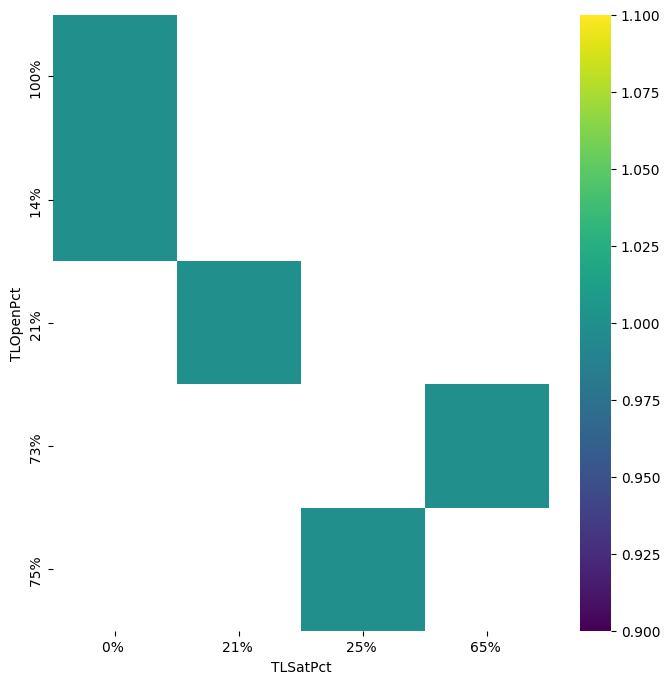

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['TLOpenPct'].value_counts()
    for x_label, grp in _df_23.groupby('TLSatPct')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('TLSatPct')
_ = plt.ylabel('TLOpenPct')

In [8]:
new_var = data.columns
new_var

Index(['TARGET', 'ID', 'DerogCnt', 'CollectCnt', 'BanruptcyInd', 'InqCnt06',
       'InqTimeLast', 'InqFinanceCnt24', 'TLTimeFirst', 'TLTimeLast',
       'TLCnt03', 'TLCnt12', 'TLCnt24', 'TLCnt', 'TLSum', 'TLMaxSum',
       'TLSatCnt', 'TLDel60Cnt', 'TLBadCnt24', 'TL75UtilCnt', 'TL50UtilCnt',
       'TLBalHCPct', 'TLSatPct', 'TLDel3060Cnt24', 'TLDel90Cnt24',
       'TLDel60CntAll', 'TLOpenPct', 'TLBadDerogCnt', 'TLDel60Cnt24',
       'TLOpen24Pct'],
      dtype='object')

In [9]:
# Checking the shape of the data
num_rows, num_cols = data.shape

print("Shape of the Data:")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}\n")

Shape of the Data:
Number of Rows: 3000
Number of Columns: 30



In [10]:
print(data.columns)

Index(['TARGET', 'ID', 'DerogCnt', 'CollectCnt', 'BanruptcyInd', 'InqCnt06',
       'InqTimeLast', 'InqFinanceCnt24', 'TLTimeFirst', 'TLTimeLast',
       'TLCnt03', 'TLCnt12', 'TLCnt24', 'TLCnt', 'TLSum', 'TLMaxSum',
       'TLSatCnt', 'TLDel60Cnt', 'TLBadCnt24', 'TL75UtilCnt', 'TL50UtilCnt',
       'TLBalHCPct', 'TLSatPct', 'TLDel3060Cnt24', 'TLDel90Cnt24',
       'TLDel60CntAll', 'TLOpenPct', 'TLBadDerogCnt', 'TLDel60Cnt24',
       'TLOpen24Pct'],
      dtype='object')


**Data preprocessing:**

* Data Cleaning

* Handle missing values

* Checking missing values

Data Cleaning

The datasets might require cleaning, such as handling missing values, converting data types and drop duplicates.

In [11]:
# Check for missing values

print(data.isnull().sum())

TARGET               0
ID                   0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64


Handle missing values

The code essentially counts how many missing values are present in each column of your test_data DataFrame and then prints that information to the console. This is an important step in data analysis and preprocessing because missing values can affect the performance of machine learning models and need to be handled appropriately.

In [12]:
# Check for missing values

print(data.isnull().sum())

TARGET               0
ID                   0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64


In [13]:
# Checking duplicates if any

data.duplicated().any()

False

* Feature Engineering:

We created a new feature TotalInquiries by combining InqCnt06 and InqFinanceCnt24. You can add more feature engineering steps as needed.

* Feature Selection:

We selected a list of features. You might need to refine this based on domain expertise or feature importance analysis.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Feature Engineering (if needed)
# Example: Create a new feature 'TotalInquiries'
data['TotalInquiries'] = data['InqCnt06'] + data['InqFinanceCnt24']

# 2. Feature Selection
features = ['DerogCnt', 'CollectCnt', 'BanruptcyInd', 'InqCnt06', 'InqTimeLast',
            'InqFinanceCnt24', 'TLTimeFirst', 'TLTimeLast', 'TLCnt03', 'TLCnt12',
            'TLCnt24', 'TLCnt', 'TLSum', 'TLMaxSum', 'TLSatCnt', 'TLDel60Cnt',
            'TLBadCnt24', 'TL75UtilCnt', 'TL50UtilCnt', 'TLBalHCPct', 'TLSatPct',
            'TLDel3060Cnt24', 'TLDel90Cnt24', 'TLDel60CntAll', 'TLOpenPct',
            'TLBadDerogCnt', 'TLDel60Cnt24', 'TLOpen24Pct', 'TotalInquiries']
X = data[features]
y = data['TARGET']

* Data Splitting:

We used train_test_split to divide the data into training and testing sets.

* Data Scaling:

We applied StandardScaler to scale numerical features.

In [17]:
# Before scaling, identify and handle columns with potential string values like '$46,211' or '74%'
for column in X_train.columns:
    # Check if the column contains any string values that might have currency symbols or commas
    if X_train[column].dtype == 'object' and any(isinstance(val, str) and (('$' in val) or (',' in val) or ('%' in val)) for val in X_train[column]):
        # If such values are found, try to convert them to numeric
        print(f"Cleaning column: {column}")  # Optional: Print the column being cleaned
        X_train[column] = X_train[column].str.replace('$', '').str.replace(',', '').str.replace('%', '').astype(float)
        X_test[column] = X_test[column].str.replace('$', '').str.replace(',', '').str.replace('%', '').astype(float)
# ----> END OF CHANGES <----

# 4. Data Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Cleaning column: TLBalHCPct
Cleaning column: TLSatPct
Cleaning column: TLOpenPct
Cleaning column: TLOpen24Pct


* Model Training:

We train three models: Logistic Regression, Random Forest, and XGBoost.

* Evaluation Function:

We define a function evaluate_model to calculate and print various evaluation metrics:

Accuracy

Precision

Recall

F1-score

* Classification Report

Model Evaluation:

We call the evaluate_model function for each trained model to assess its performance on the test data.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer # Importing the SimpleImputer

# Assuming you have X_train, X_test, y_train, y_test from previous steps

# Imputation to handle missing values
imputer = SimpleImputer(strategy='mean') # Creating an imputer with 'mean' strategy
X_train = imputer.fit_transform(X_train) # Fitting and transforming on training data
X_test = imputer.transform(X_test) # Transforming the test data


# 1. Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# 2. Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# 3. XGBoost
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred)}")
    print(f"Recall: {recall_score(y_true, y_pred)}")
    print(f"F1-Score: {f1_score(y_true, y_pred)}")
    print(classification_report(y_true, y_pred))
    print("\n")

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

--- Logistic Regression ---
Accuracy: 0.8133333333333334
Precision: 0.5789473684210527
Recall: 0.1864406779661017
F1-Score: 0.28205128205128205
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       482
           1       0.58      0.19      0.28       118

    accuracy                           0.81       600
   macro avg       0.70      0.58      0.59       600
weighted avg       0.78      0.81      0.77       600



--- Random Forest ---
Accuracy: 0.81
Precision: 0.6
Recall: 0.1016949152542373
F1-Score: 0.17391304347826086
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       482
           1       0.60      0.10      0.17       118

    accuracy                           0.81       600
   macro avg       0.71      0.54      0.53       600
weighted avg       0.77      0.81      0.75       600



--- XGBoost ---
Accuracy: 0.815
Precision: 0.5660377358490566
Recall: 0.2542372881355932


In [20]:
!pip install matplotlib


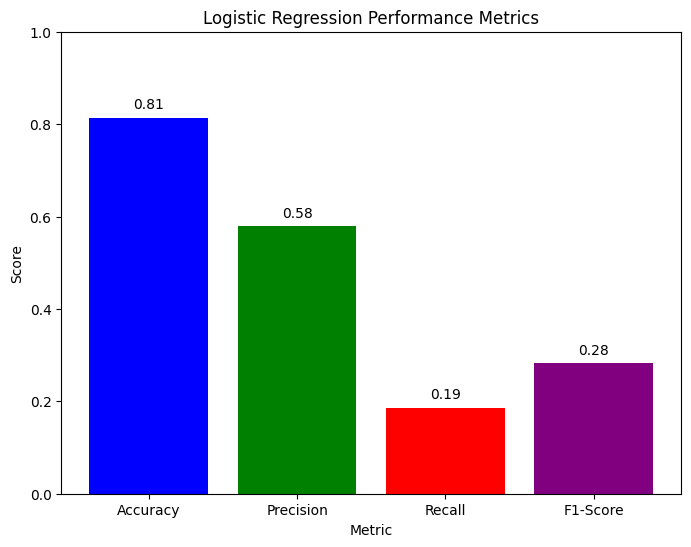

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Create a bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [0.8133333333333334, 0.5789473684210527, 0.1864406779661017, 0.28205128205128205]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Logistic Regression Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)

# Add value labels on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', color='black')

plt.show()

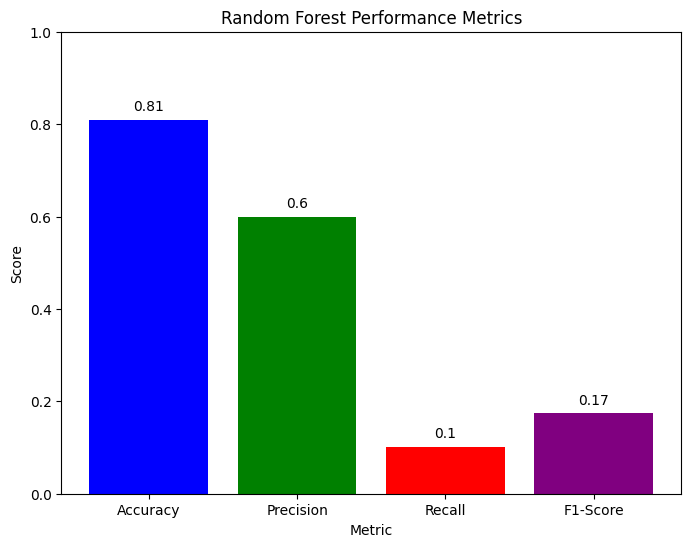

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and values for Random Forest
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values_rf = [0.81, 0.6, 0.1016949152542373, 0.17391304347826086]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values_rf, color=['blue', 'green', 'red', 'purple'])
plt.title('Random Forest Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)

# Add value labels on top of the bars
for i, v in enumerate(values_rf):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', color='black')

plt.show()

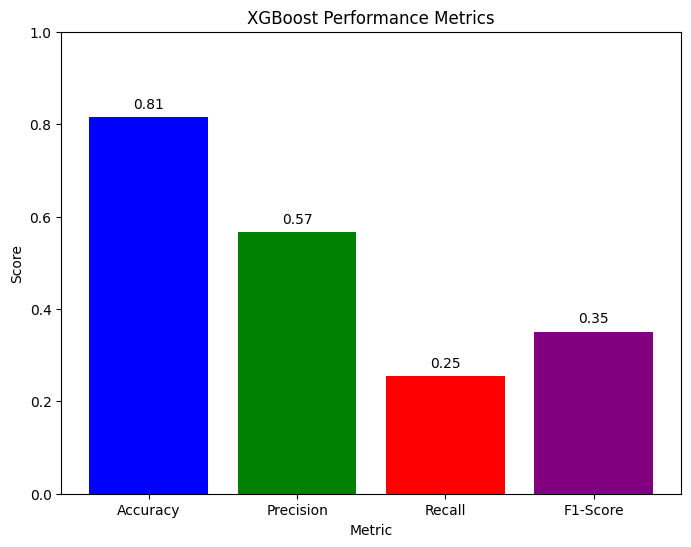

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and values for XGBoost
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values_xgb = [0.815, 0.5660377358490566, 0.2542372881355932, 0.3508771929824561]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values_xgb, color=['blue', 'green', 'red', 'purple'])
plt.title('XGBoost Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)

# Add value labels on top of the bars
for i, v in enumerate(values_xgb):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', color='black')

plt.show()

**Project Overview:**

**Objective:**

The project aims to build a credit scoring model to predict the creditworthiness of individuals. This is typically used by financial institutions to assess the risk of lending money to potential borrowers.

**Data:**

The project uses a dataset named 'Dataset_CreditScoring.csv' located in your Google Drive. The dataset likely contains various features related to an individual's credit history, such as:

* Derogatory and collection counts

* Bankruptcy indicators

* Inquiry counts and timing

* Tradeline information (e.g., open accounts, balances, delinquencies)

**Data Preprocessing:**

1. Data Cleaning:

The code checks for missing values and duplicates in the dataset. It also handles potential string values in numerical columns, like currency symbols or commas.

2. Feature Engineering:

A new feature, 'TotalInquiries', is created by combining existing features ('InqCnt06' and 'InqFinanceCnt24').

3. Feature Selection:

Specific features are selected for model training, possibly based on domain expertise or prior feature importance analysis.

4. Data Splitting:

The data is split into training and testing sets using train_test_split.

5. Data Scaling:

Numerical features are scaled using StandardScaler to ensure they have a similar range and prevent features with larger values from dominating the model.

6. Missing Value Imputation:

Missing values are handled using SimpleImputer with a 'mean' strategy, replacing missing values with the mean of the respective column.

**Models:**

Three different machine learning models are trained and evaluated:

* Logistic Regression
* Random Forest
* XGBoost

**Evaluation Metrics:**

The performance of each model is assessed using the following metrics:

* Accuracy:
The overall correctness of the model's predictions.

* Precision: The proportion of correctly predicted positive cases among all predicted positive cases.
* Recall: The proportion of correctly predicted positive cases among all actual positive cases.
* F1-Score: A balanced measure that considers both precision and recall.
* Classification Report: Provides a breakdown of precision, recall, and F1-score for each class (e.g., good credit, bad credit).

**Results:**

Based on the evaluation results you provided:

* All three models have similar accuracy scores around 0.81.
* Logistic Regression achieves the highest recall (0.186), while Random Forest has the lowest (0.101).
* Random Forest has the highest precision (0.60).
* XGBoost seems to balance precision and recall relatively well compared to the other models, achieving a recall of 0.25 and a precision of 0.57.

**Conclusion:**

* The models show decent overall accuracy, but their performance in identifying positive cases (potentially risky borrowers) is limited as indicated by the lower recall scores, particularly for Random Forest. Depending on the business objective (whether to prioritize correctly identifying risky borrowers or minimize false positives), a specific model can be chosen.
* Further model tuning or feature engineering might be necessary to improve the recall and F1-score, especially if identifying risky borrowers is a critical requirement.
* Comparing the models, XGBoost might be slightly more balanced in its predictions, while Logistic Regression might be preferred if recall is important (more likely to capture actual positive cases but may have more false positives).
* The choice of the final model depends on the specific business needs and the trade-offs between different evaluation metrics.